# FRL EDA Insights

Each row represents a school; each column represents info about the school.
Here are the key insights for the FRL data:
- we should filter by site city since that represents the school location (we are interested in Evanston only)
- there are 18 schools in evanston
- mean eligibility percent is relatively low (36.609%)
- 88.89% of schools are public
- the distribution of eligibility percentages in evanston is right skewed (most schools have low eligibility percentages)
- the rest of illinois has a bell-shaped distribution for eligibility percentages; with more mass on the right (perhaps related to south-chicago)
- most schools in evanston are on the smaller side (enrollment ~ 500- 1000), with all the middle schools feeding into ETHS which is massive
- the enrollment in rest of chcicago is right skewed, and is also generally bigger
- the correlation between eligibility and enrollment is negligible










In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datapath_20 = "../Data/Free Reduced Meal Program/FY20-eligibility.xlsx"
datapath_19 = "../Data/Free Reduced Meal Program/fy19-eligibilitydata.xlsx"
eli_20 = pd.read_excel(datapath_20, sheet_name="Sheet1", skiprows= [0,1,2])
eli_19 = pd.read_excel(datapath_19, sheet_name="Sheet1", skiprows= [0,1,2])
#converting 'X' to 1/0 coding in public indicator column
eli_20['Public'] = eli_20['Public'].apply(lambda val: 1 if val == 'X' else 0)
eli_19['Public'] = eli_19['Public'].apply(lambda val: 1 if val == 'X' else 0)
eli_20.head()

,Program Year,RCDT,District,Site Number,RegionName,Site,Public,Free Eligibles,Reduced Eligibles,PaidEligibles,...,Eligibility Percent,Participates in CEP,Sponsor Address,Sponsor City,Sponsor Phone,Site Address,Site City,Site County,Site Email,Site Zip
0,2020,01000000000,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,70305,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,PACE Alternative School,1,6,0,2,...,75.00,NaN,507 Vermont St,Quincy,2.172772e+09,201 E Higbee St,Pittsfield,Pike,btomhave@pikeland.org,62363-1946
1,2020,01000000000,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,62954,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,The Lafayette Academy,1,36,0,0,...,97.56,X,507 Vermont St,Quincy,2.172772e+09,747 W Lafayette Ave,Jacksonville,Morgan,pmcelroy@roe1.net,62650-1832
2,2020,01000000000,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,63218,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,ARC,1,22,0,0,...,100.00,X,507 Vermont St,Quincy,2.172772e+09,747 W Lafayette Ave,Jacksonville,Morgan,pmcelroy@roe1.net,62650-1832
3,2020,01000000000,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,61242,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,Adams County RSSP,1,80,0,0,...,100.00,X,507 Vermont St,Quincy,2.172772e+09,1416 Maine St,Quincy,Adams,dniederhauser@roe1.net,62301-4261
4,2020,01001001026,Payson CUSD 1,10003,Adam/Brwn/Cass/Morgn/Pik/Sctt ROE,Seymour High School,1,90,22,138,...,44.80,NaN,406 W State St,Payson,2.176563e+09,420 W Brainard St,Payson,Adams,malthoff@cusd1.org,62360-1033


In [3]:
eli_20.columns

Index(['Program Year', 'RCDT', 'District', 'Site Number', 'RegionName', 'Site',
       'Public', 'Free Eligibles', 'Reduced Eligibles', 'PaidEligibles',
       'Enrollment', 'Eligibility Percent', 'Participates in CEP',
       'Sponsor Address', 'Sponsor City', 'Sponsor Phone', 'Site Address',
       'Site City', 'Site County', 'Site Email', 'Site Zip'],
      dtype='object')

In [4]:
#filter by site city since that represents the school location
eli_20_ev = eli_20[eli_20['Site City'] == 'Evanston']
eli_20_ev.head(18)

,Program Year,RCDT,District,Site Number,RegionName,Site,Public,Free Eligibles,Reduced Eligibles,PaidEligibles,...,Eligibility Percent,Participates in CEP,Sponsor Address,Sponsor City,Sponsor Phone,Site Address,Site City,Site County,Site Email,Site Zip
354,2020,05016065004,Evanston CCSD 65,11141,Region 05 North Cook ISC 1,Orrington Elem School,1,53,15,315,...,17.75,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,2636 Orrington Ave,Evanston,Cook,masonschultzk@district65.net,60201-1761
355,2020,05016065004,Evanston CCSD 65,11146,Region 05 North Cook ISC 1,Kingsley Elementary School,1,80,13,292,...,24.16,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,2300 Green Bay Rd,Evanston,Cook,masonschultzk@district65.net,60201-2229
356,2020,05016065004,Evanston CCSD 65,11138,Region 05 North Cook ISC 1,Lincoln Elem School,1,111,17,391,...,24.66,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,910 Forest Ave,Evanston,Cook,masonschultzk@district65.net,60202-1474
357,2020,05016065004,Evanston CCSD 65,11139,Region 05 North Cook ISC 1,Lincolnwood Elem School,1,82,13,280,...,25.33,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,2600 Colfax St,Evanston,Cook,masonschultzk@district65.net,60201-2107
358,2020,05016065004,Evanston CCSD 65,11137,Region 05 North Cook ISC 1,Dewey Elem School,1,102,18,335,...,26.37,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,1551 Wesley Ave,Evanston,Cook,masonschultzk@district65.net,60201-4121
359,2020,05016065004,Evanston CCSD 65,11144,Region 05 North Cook ISC 1,Willard Elem School,1,115,16,363,...,26.52,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,2700 Hurd Ave,Evanston,Cook,masonschultzk@district65.net,60201-1268
360,2020,05016065004,Evanston CCSD 65,11134,Region 05 North Cook ISC 1,Haven Middle School,1,199,27,620,...,26.71,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,2417 Prairie Ave,Evanston,Cook,masonschultzk@district65.net,60201-2214
361,2020,05016065004,Evanston CCSD 65,11135,Region 05 North Cook ISC 1,Nichols Middle School,1,185,29,540,...,28.38,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,800 Greenleaf St,Evanston,Cook,masonschultzk@district65.net,60202-1334
362,2020,05016065004,Evanston CCSD 65,11142,Region 05 North Cook ISC 1,Walker Elem School,1,115,17,241,...,35.39,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,3601 Church St,Evanston,Cook,masonschultzk@district65.net,60203-1605
363,2020,05016065004,Evanston CCSD 65,11143,Region 05 North Cook ISC 1,Washington Elem School,1,173,22,334,...,36.86,NaN,1500 McDaniel Ave,Evanston,8.478598e+09,914 Ashland Ave,Evanston,Cook,masonschultzk@district65.net,60202-1606


In [6]:
#number of schools in evanston
len(eli_20_ev)

18

In [7]:
#mean eligibility percent is relatively low (36.609%)
eli_20_ev['Eligibility Percent'].mean()

39.60944444444445

In [8]:
#proportion of schools that are public
eli_20_ev['Public'].sum()/len(eli_20_ev)*100

88.88888888888889

Text(0.5, 1.0, 'Eligibility - Evanston Only')

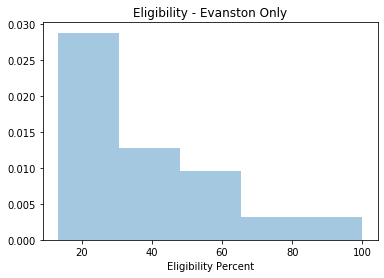

In [9]:
#eligibility percentage dist (most schools in evanston have a low eligibility percentage)
sns.distplot(eli_20_ev['Eligibility Percent'], kde = False, norm_hist= True)
plt.title("Eligibility - Evanston Only")

Text(0.5, 1.0, 'Eligibility - All Chicago')

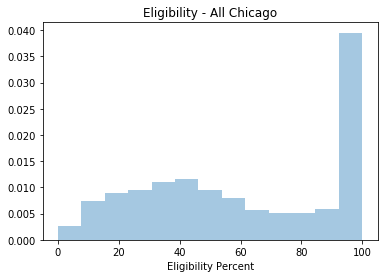

In [10]:
#the rest of chicago has a more mass on the right of the eligibility percentage distribution
sns.distplot(eli_20['Eligibility Percent'], kde = False, norm_hist= True)
plt.title("Eligibility - All Chicago")

Text(0.5, 1.0, 'Enrollment - Evanston Only')

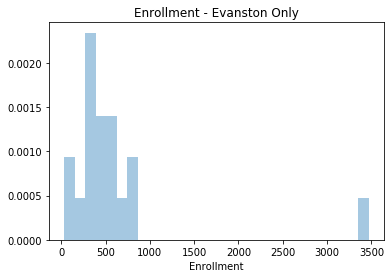

In [11]:
#most schools in evanston are on the smaller side (enrollment ~ 500- 1000)
sns.distplot(eli_20_ev['Enrollment'], kde = False, norm_hist= True)
plt.title("Enrollment - Evanston Only")

Text(0.5, 1.0, 'Enrollment - Rest of chicago')

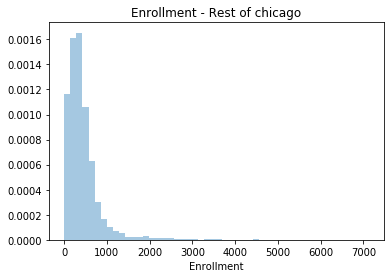

In [12]:
#the enrollment in rest of chcicago is right skewed, and is also generally bigger
sns.distplot(eli_20['Enrollment'], kde = False, norm_hist= True)
plt.title("Enrollment - Rest of chicago")

In [13]:
eli_20_ev['Site Zip'].unique()

array(['60201-1761', '60201-2229', '60202-1474', '60201-2107',
       '60201-4121', '60201-1268', '60201-2214', '60202-1334',
       '60203-1605', '60202-1606', '60201-3932', '60202-2721',
       '60202-3254', '60202-2861', '60202-1706', '60201-3449',
       '60202-1620', '60202-1619'], dtype=object)

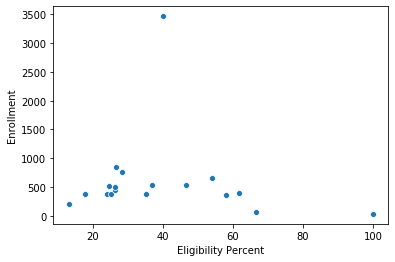

In [16]:
sns.scatterplot(y = eli_20_ev['Enrollment'], x = eli_20_ev['Eligibility Percent'])

In [17]:
eli_20_ev[['Enrollment', 'Eligibility Percent']].corr()

,Enrollment,Eligibility Percent
Enrollment,1.000000,-0.121499
Eligibility Percent,-0.121499,1.000000


In [6]:
eli_20_ev.to_csv("../Data/Free Reduced Meal Program/FY20-eligibility-coords.csv")

Program Year           18
RCDT                   18
District               18
Site Number            18
RegionName             18
Site                   18
Public                 18
Free Eligibles         18
Reduced Eligibles      18
PaidEligibles          18
Enrollment             18
Eligibility Percent    18
Participates in CEP     0
Sponsor Address        18
Sponsor City           18
Sponsor Phone          18
Site Address           18
Site City              18
Site County            18
Site Email             18
Site Zip               18
dtype: int64